## Time Series EDA
- Single continuous variable over (uniformly distributed) time
- Understand temporal behavior of data: trend and seasonality, cycle
- Identify underlying distribution and nature of temporal processes producing data

#### Setup
°F = (K - 273.15) x 1.8000 + 32.00

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

NumExpr defaulting to 8 threads.


Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


In [4]:
df.head(12)

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652
2012-10-01 22:00:00,61.578379


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45252 entries, 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    45252 non-null  float64
dtypes: float64(1)
memory usage: 707.1 KB


In [6]:
df.isna().sum()

temp    0
dtype: int64

In [7]:
df.describe()

,temp
count,45252.000000
mean,69.144163
std,14.946638
min,17.420000
25%,59.810000
50%,71.661650
75%,79.412000
max,104.918000


- **Seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality  
    - Quite common in economic time series. It is less common in engineering and scientific data.
    - Can help us understand underlying dynamics


- **Trend**: long term upwards or downwards movement  
- **Cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Split your data before exploration (if you are going to do modeling)

## Visualizations

In [8]:
# look at the head of df
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [9]:
# create a series called 'y'

y = df.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

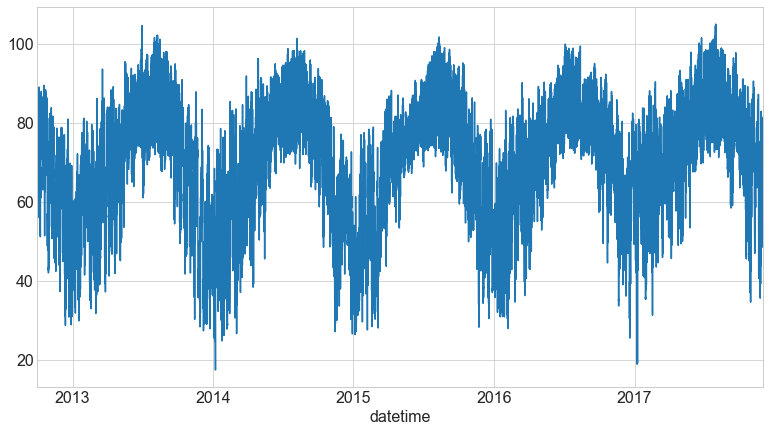

In [10]:
y.plot();

Re-sampling at a longer frequency "smooths" the line

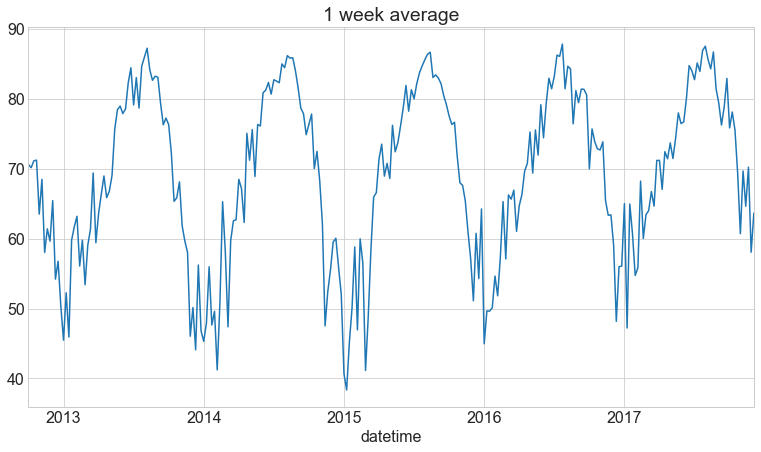

In [11]:
y.resample('W').mean().plot(title='1 week average');

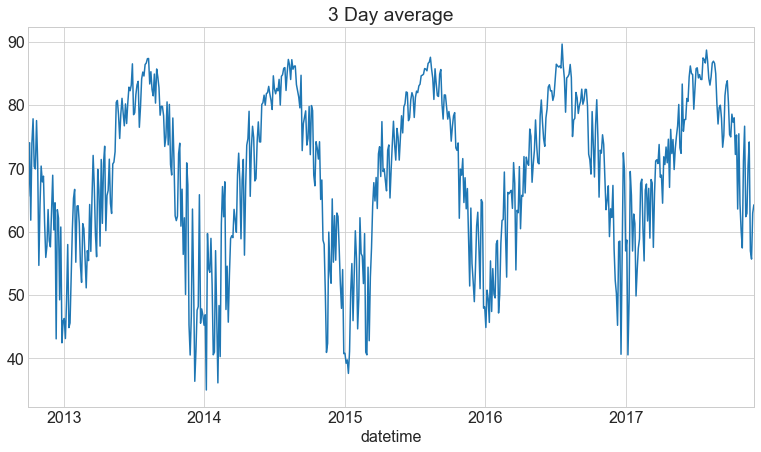

In [12]:
y.resample('3D').mean().plot(title='3 Day average');

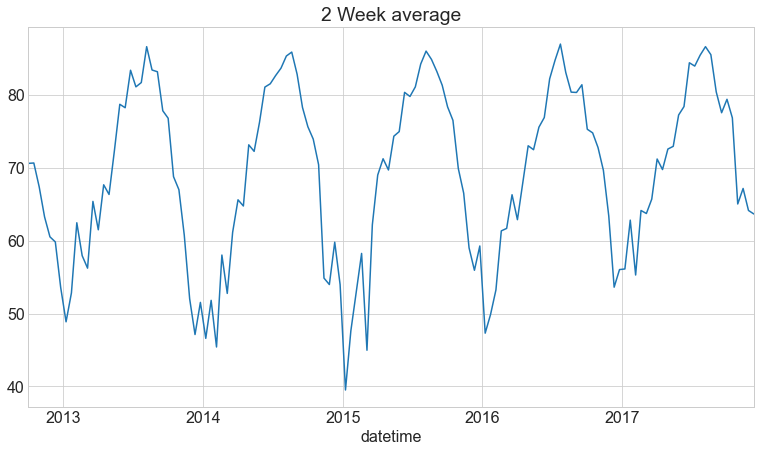

In [13]:
y.resample('2W').mean().plot(title='2 Week average');

We can combine multiple resampling periods on a single viz:

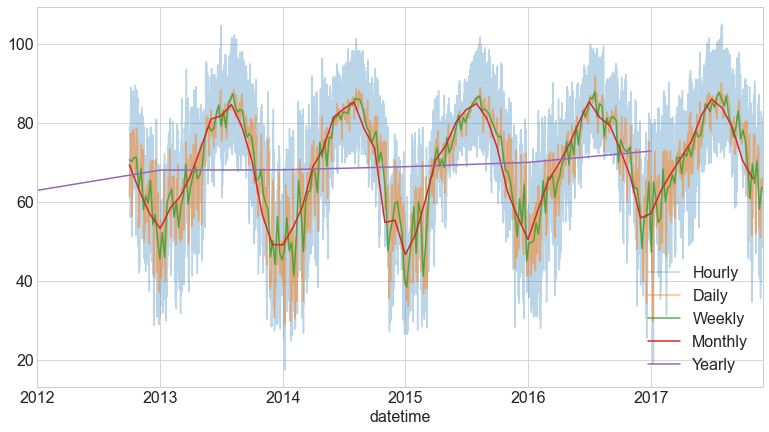

In [14]:
ax = y.plot(alpha=.3, label='Hourly')
y.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
y.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
y.resample('M').mean().plot(ax=ax, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

### Treat date components as categorical variables


<div class="alert alert-info">
    <p><strong>Aside: Month and Weekday Ordering</strong></p>
    <p>By default, matplotlib/pandas will sort months and weekdays alphabetically, which is usually not what we want.</p>
    <p>There are several ways to work around this:</p>
    <ul>
        <li>Just use the month (1-12) number or weekday number (1-7)</li>
        <li>Instead of using just the month or weekday, use a leading number and then the name (e.g. 1-Jan, 2-Feb)</li>
        <li>Use a combination of the techniques above, and then re-index the resulting pandas object with more human friendly names</li>
        <li>Use a combination of the techniques above, and then manually adjust the labels with matplotlib</li>
    </ul>
</div>

#### Visualize by month


In [15]:
# make an new column 'month'
df['month'] = df.index.month

<AxesSubplot:xlabel='datetime'>

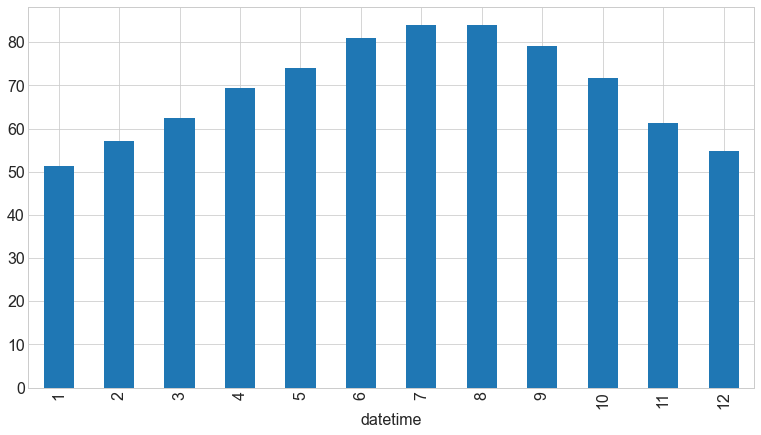

In [16]:
y.groupby(y.index.month).mean().plot.bar()

<AxesSubplot:xlabel='datetime'>

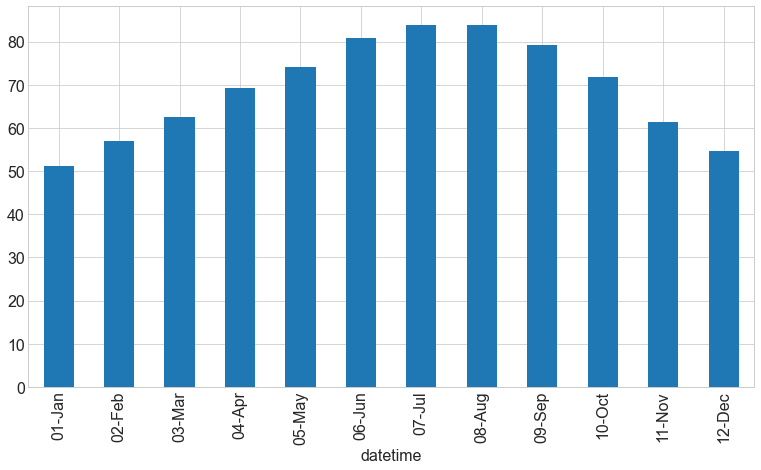

In [17]:
# Plot mean temperature by month (bar plot)

df.groupby(df.index.strftime('%m-%b')).temp.mean().plot.bar()

#### What if we want to visualize more than just the mean temperature?

In [18]:
df.groupby('month').describe()

temp                                                                 \
        count       mean        std      min       25%        50%        75%   
month                                                                          
1      3720.0  51.259738  12.423554  17.4200  41.39600  50.990000  60.811250   
2      3384.0  57.038305  12.742124  27.5582  47.28200  58.417550  66.218777   
3      3720.0  62.539928  11.217577  26.6180  55.40000  63.623015  70.088000   
4      3600.0  69.322227   9.402450  38.3720  63.74750  70.053386  75.614000   
5      3720.0  74.025145   8.398583  45.0680  69.54425  74.336000  79.448000   
6      3600.0  80.881883   6.796530  63.4820  75.82955  79.982600  85.949000   
7      3720.0  83.949816   7.787469  60.9800  77.52200  82.652000  90.612500   
8      3720.0  83.912759   7.874091  66.1820  77.39600  82.616000  90.411125   
9      3600.0  79.227516   7.803889  54.3764  74.03000  78.404000  85.082900   
10     4451.0  71.785192  10.199030  34.5920  65.21690  72.950000  78.958400   
11     4297.0  61.396853  11.991865  27.1040  53.92400  62.816000  70.286000   
12     3720.0  54.689498  11.862930  25.5020  45.95000  54.954500  63.896000   

                
           max  
month           
1       83.696  
2       90.302  
3       93.542  
4       96.224  
5       97.826  
6      104.540  
7      104.918  
8      102.092  
9       98.510  
10      95.090  
11      90.500  
12      83.372

<AxesSubplot:xlabel='month', ylabel='temp'>

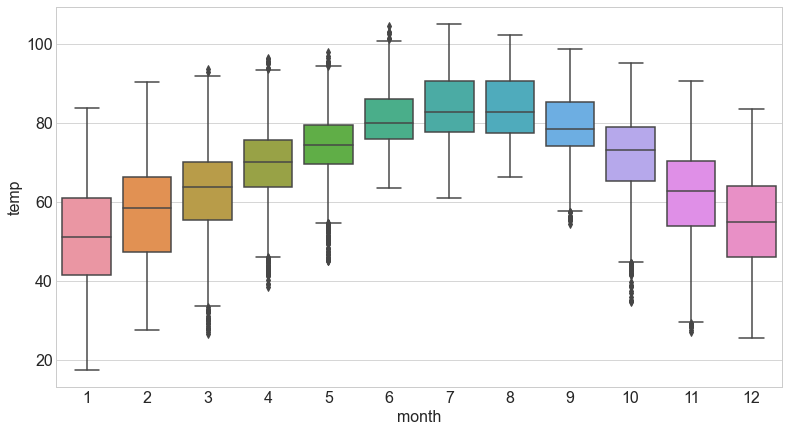

In [19]:
# boxplot for each month
sns.boxplot(data = df, x = 'month', y = 'temp')

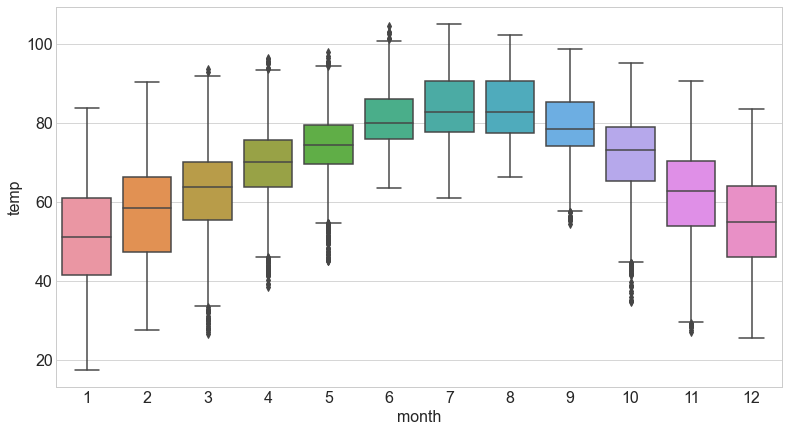

In [20]:
#sns.diverging_palette(220, 20, as_cmap=True)
sns.color_palette("vlag", as_cmap=True)
sns.boxplot(data = df, x = 'month', y = 'temp');


### TO DO:
[] Come back and work on this to get the pallete and hues to make sense for hot/cold temperatures visually

- more variation in temps in fall/winter
- less variation in temps in summer months

### Moving averages

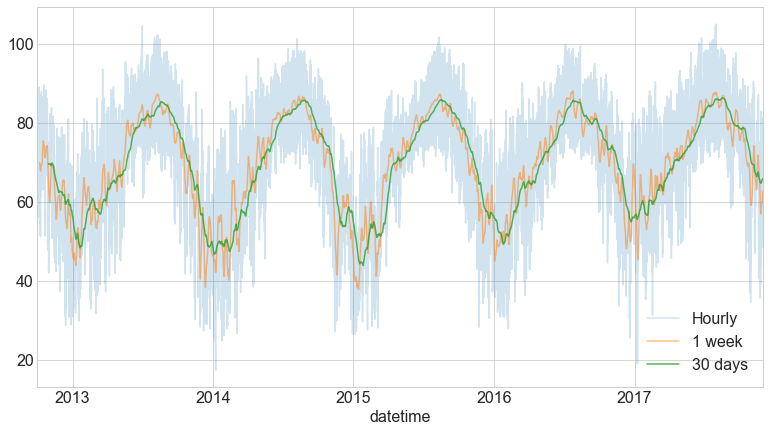

In [21]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=.8, label='30 days')
plt.legend();

**Differences**

`.diff` let's us take the difference between the current and previous value.


In [22]:
y.resample('W').mean().diff()

datetime
2012-10-07          NaN
2012-10-14    -0.442379
2012-10-21     0.985554
2012-10-28     0.092089
2012-11-04    -7.719911
                ...    
2017-11-05     8.962821
2017-11-12    -5.038438
2017-11-19     5.584824
2017-11-26   -12.164421
2017-12-03     5.597716
Freq: W-SUN, Name: temp, Length: 270, dtype: float64

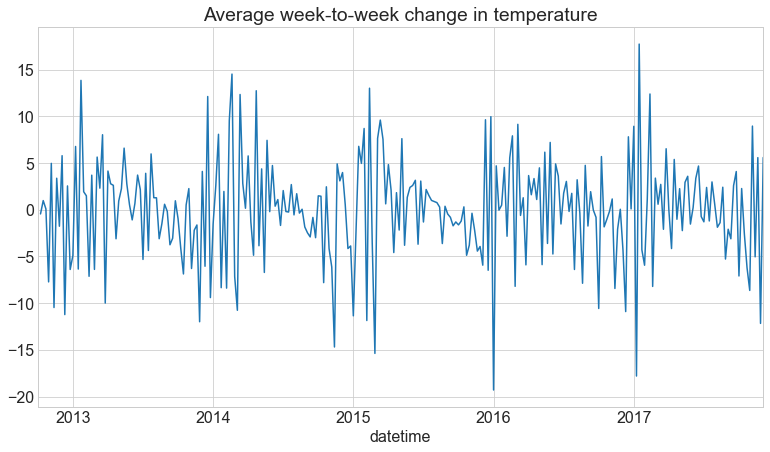

In [23]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature');

- Higher weekly temp swings in fall and winter months 

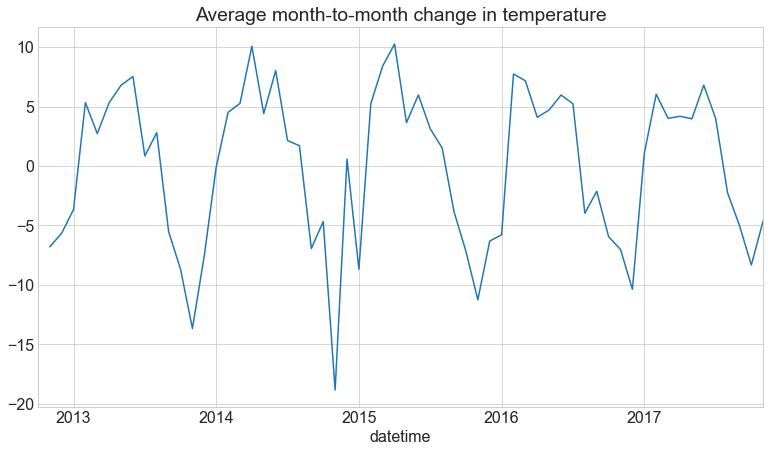

In [24]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature');

### Seasonal Plot
- comparison of multiple years together.

<AxesSubplot:xlabel='datetime'>

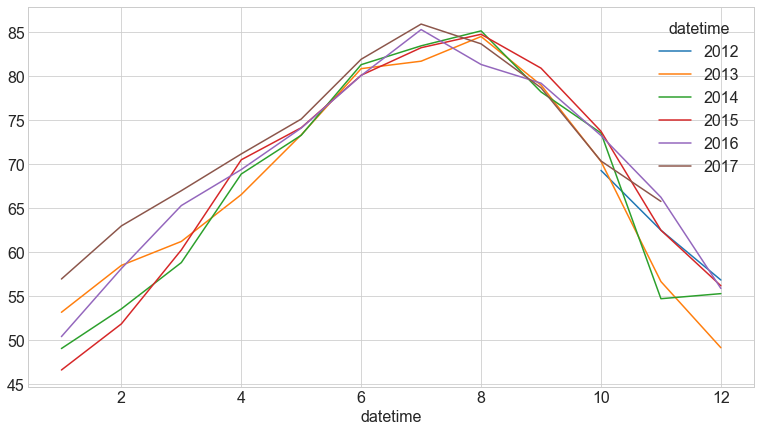

In [25]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Seasonal Subseries Plot
A seasonal subseries plot shows the change year-over-year within each month.

In [26]:
y.groupby([y.index.year, y.index.month]).mean()

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
                        ...    
2017      7           85.950421
          8           83.704693
          9           78.710470
          10          70.387013
          11          65.793796
Name: temp, Length: 62, dtype: float64

In [27]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224
2017,56.974173,63.008948,67.011986,71.190292,75.155702,81.952495,85.950421,83.704693,78.710470,70.387013,65.793796,NaN


`.unstack()` operates like a pivot table 

In [28]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016,2017
datetime,,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347,56.974173
2,NaN,58.522799,53.579080,51.874683,58.165749,63.008948
3,NaN,61.244479,58.842459,60.277705,65.323011,67.011986
4,NaN,66.569717,68.908933,70.526879,69.415316,71.190292
5,NaN,73.358529,73.311970,74.169747,74.129780,75.155702
...,...,...,...,...,...,...
8,NaN,84.534117,85.178102,84.789859,81.357023,83.704693
9,NaN,79.016805,78.238621,80.938208,79.233476,78.710470
10,69.318705,70.343832,73.567252,73.766466,73.284788,70.387013


In [29]:
y.groupby([y.index.year, y.index.month]).mean().unstack(1)

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224
2017,56.974173,63.008948,67.011986,71.190292,75.155702,81.952495,85.950421,83.704693,78.710470,70.387013,65.793796,NaN


In [30]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224
2017,56.974173,63.008948,67.011986,71.190292,75.155702,81.952495,85.950421,83.704693,78.710470,70.387013,65.793796,NaN


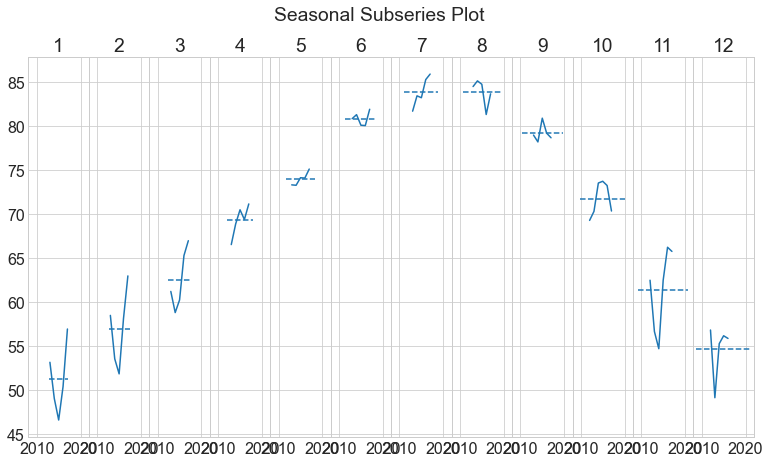

In [31]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Try to make boxplots

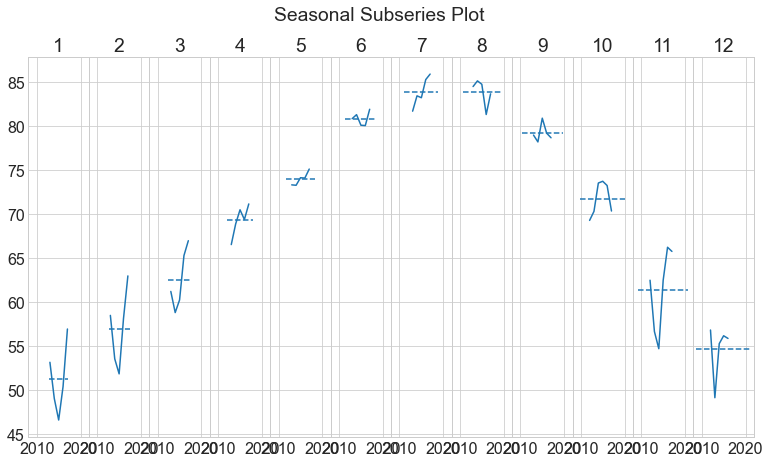

In [32]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

### What if seasonality is not that readily apparent?

Is there a seasonality in this data?

![Screen%20Shot%202021-04-15%20at%203.43.52%20PM%202.png](temps.png)
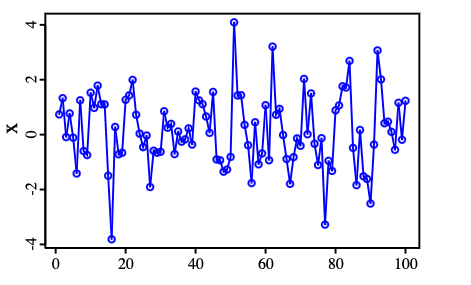

### Lag plot

In [33]:
y.shift(-1)

datetime
2012-10-01 13:00:00    61.076568
2012-10-01 14:00:00    61.139294
2012-10-01 15:00:00    61.202020
2012-10-01 16:00:00    61.264747
2012-10-01 17:00:00    61.327473
                         ...    
2017-11-29 20:00:00    72.806000
2017-11-29 21:00:00    73.202000
2017-11-29 22:00:00    71.834000
2017-11-29 23:00:00    65.966000
2017-11-30 00:00:00          NaN
Name: temp, Length: 45252, dtype: float64

Text(0.5, 1.0, 'Lag plot with lag = 1')

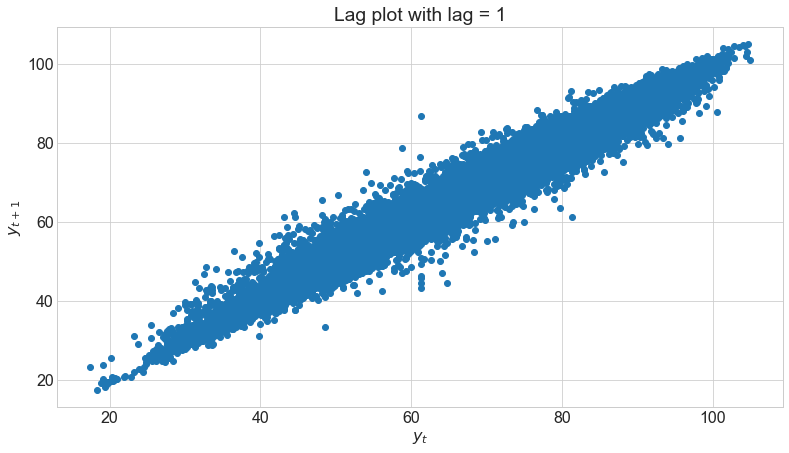

In [34]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

<AxesSubplot:xlabel='temp', ylabel='temp_next_day'>

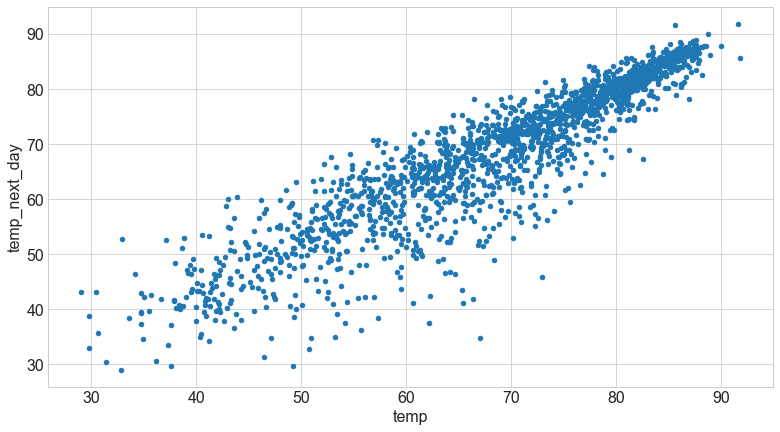

In [35]:
daily = df.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [36]:
weekly = df.resample('W').mean()
weekly['1_weeks_out'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.head()

,this_week,month,1_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,70.152821
2012-10-14,70.152821,10.000000,71.138375
2012-10-21,71.138375,10.000000,71.230464
2012-10-28,71.230464,10.000000,63.510554
2012-11-04,63.510554,10.571429,68.482625


<AxesSubplot:xlabel='this_week', ylabel='1_weeks_out'>

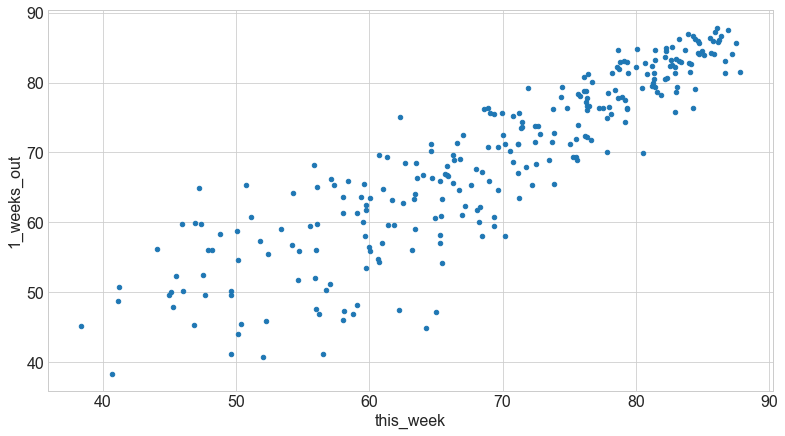

In [37]:
weekly.plot.scatter(x='this_week', y='1_weeks_out')

,this_week,month,12_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,50.376741
2012-10-14,70.152821,10.000000,45.473616
2012-10-21,71.138375,10.000000,52.252877
2012-10-28,71.230464,10.000000,45.907936
2012-11-04,63.510554,10.571429,59.763739


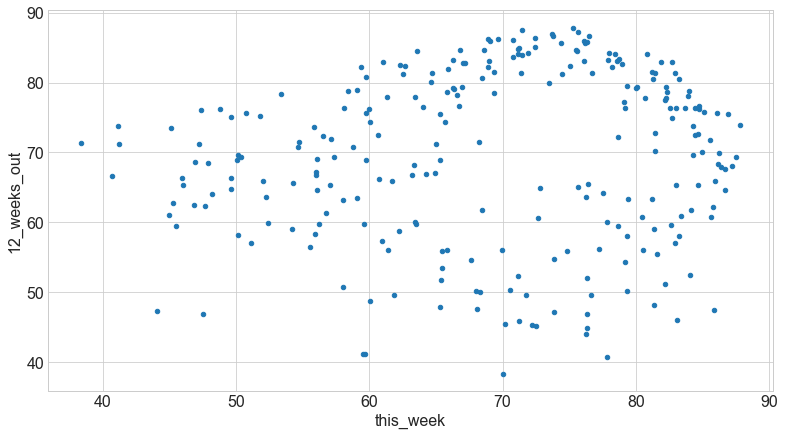

In [38]:
weekly = df.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly.head()

,this_week,month,26_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,63.558611
2012-10-14,70.152821,10.000000,66.345532
2012-10-21,71.138375,10.000000,68.965502
2012-10-28,71.230464,10.000000,65.862071
2012-11-04,63.510554,10.571429,66.797107


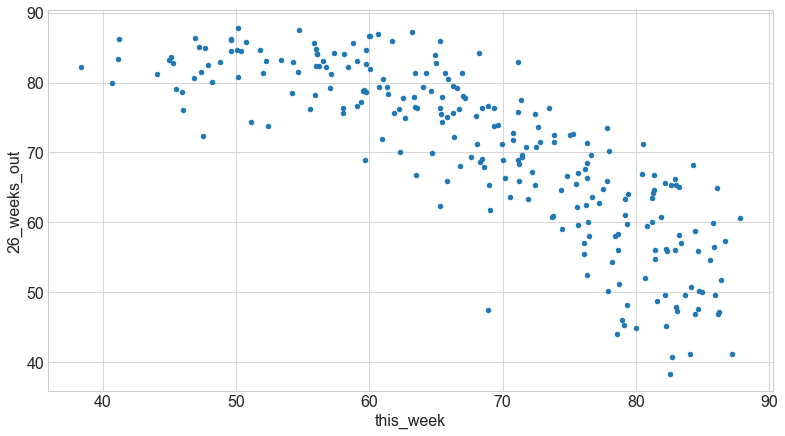

In [39]:
weekly = df.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly.head()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

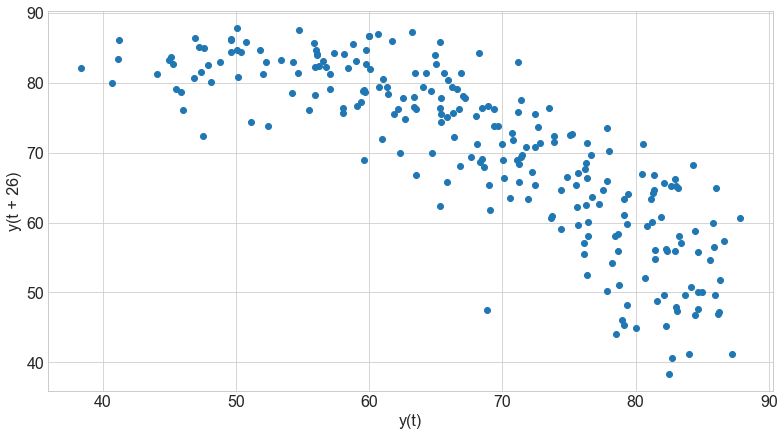

In [40]:
# easier way. Use pd.plotting.lag_plot(series, lag):

pd.plotting.lag_plot(df.temp.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

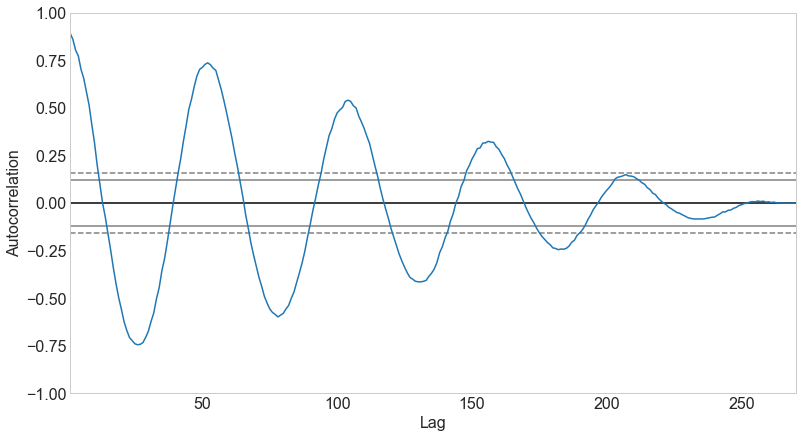

In [41]:
pd.plotting.autocorrelation_plot(df.temp.resample('W').mean())

### What does autocorrelation plot look like for white noise

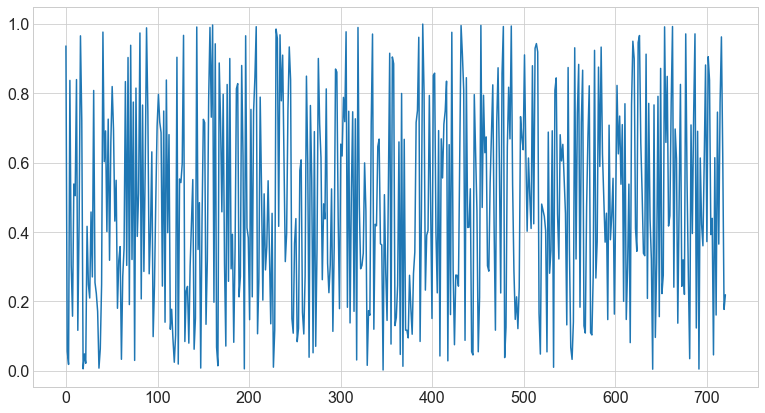

In [42]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

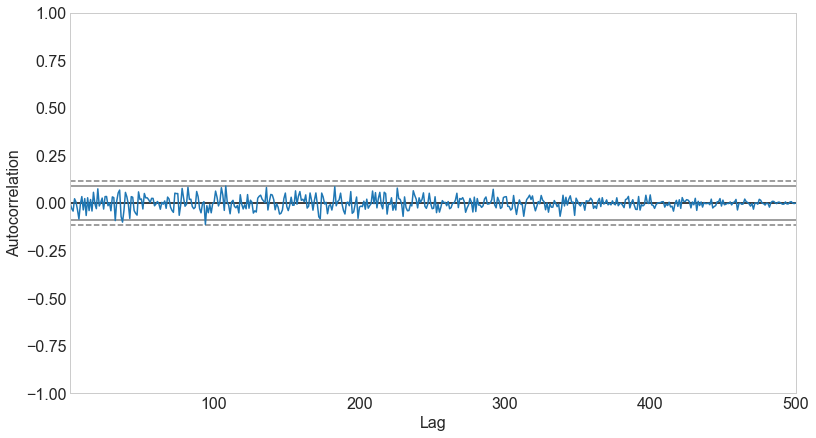

In [43]:
#plot the autocorrelation for noise

pd.plotting.autocorrelation_plot(noise)

### Another example of Autocorrelation

![Screen%20Shot%202021-04-15%20at%203.43.52%20PM.png](auto.png)
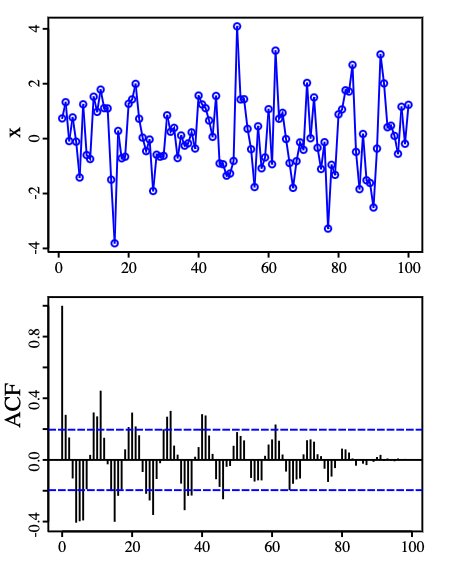

#### Visuals seasonal subseries plot and the box plot assume that the seasonal periods are known. However, if the seasonality period is not readlity apparent , the autocorrelation plot can help. 
#### If there is significant seasonality, the autocorrelation plot should show spikes at lags equal to the period.

### Seasonal Decomposition

$$ y = S + T + \epsilon $$

### data = Seasonality + Trend + Residual

In [44]:
y = df.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [45]:
# we can access different attributes of object created above (e.g. seasonal, trend and resid)
result.seasonal

datetime
2012-10-07     6.064084
2012-10-14     6.503944
2012-10-21     2.448327
2012-10-28     1.698676
2012-11-04     0.210992
                ...    
2017-11-05    -2.717416
2017-11-12    -9.603230
2017-11-19   -10.401703
2017-11-26   -13.584940
2017-12-03   -14.119513
Freq: W-SUN, Name: seasonal, Length: 270, dtype: float64

In [46]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,6.064084,NaN
2012-10-14,70.152821,NaN,6.503944,NaN
2012-10-21,71.138375,NaN,2.448327,NaN
2012-10-28,71.230464,NaN,1.698676,NaN
2012-11-04,63.510554,NaN,0.210992,NaN


<AxesSubplot:xlabel='datetime'>

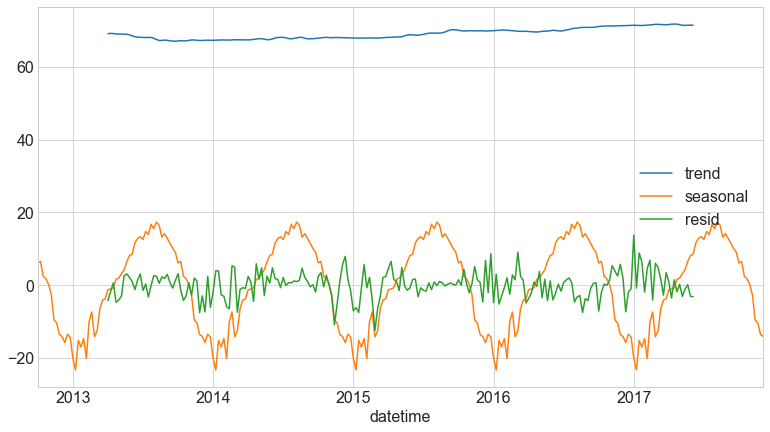

In [47]:
decomposition.iloc[:, 1:].plot()

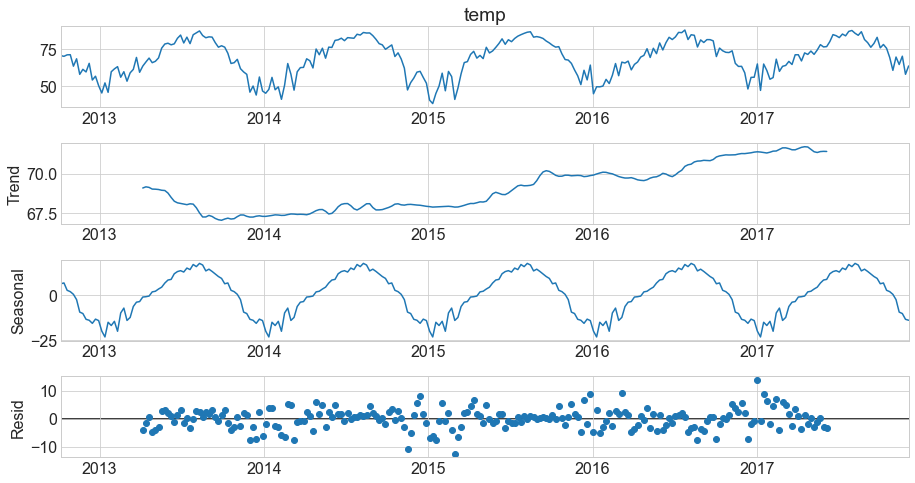

In [48]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?


The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. 


https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

Effectively, with multiplicative seasonality the width of the seasonal pattern is proportional to the level. For additive seasonality it is independent.

### Categories over time

In [49]:
df = df.resample('D').mean()
df.head()

,temp,month
datetime,,
2012-10-01,61.330942,10
2012-10-02,65.678822,10
2012-10-03,67.411250,10
2012-10-04,67.703750,10
2012-10-05,77.073125,10


In [50]:
# create a categorical feature
df['temp_bin'] = pd.qcut(df.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
df.groupby('temp_bin').temp.mean()

temp_bin
cold    50.632619
cool    66.258328
warm    75.926360
hot     83.758294
Name: temp, dtype: float64

In [51]:
df.head()

,temp,month,temp_bin
datetime,,,
2012-10-01,61.330942,10,cool
2012-10-02,65.678822,10,cool
2012-10-03,67.411250,10,cool
2012-10-04,67.703750,10,cool
2012-10-05,77.073125,10,warm


How can we visualize the temp_bin feature over time?

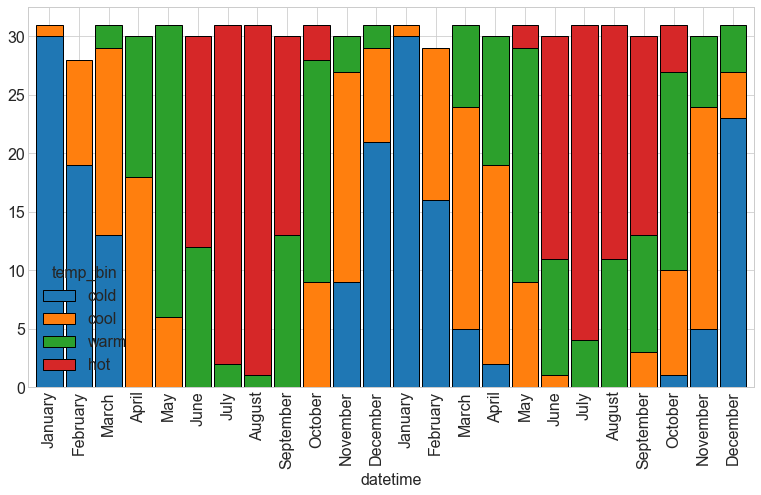

In [52]:
ax = (df['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

**NOTE** Using domain knowledge to pass actual cutoff values for cool/warm vs. quartiles 

##### another chart I saw recently
https://coronavirus.health.ny.gov/covid-19-variant-data

### strftime

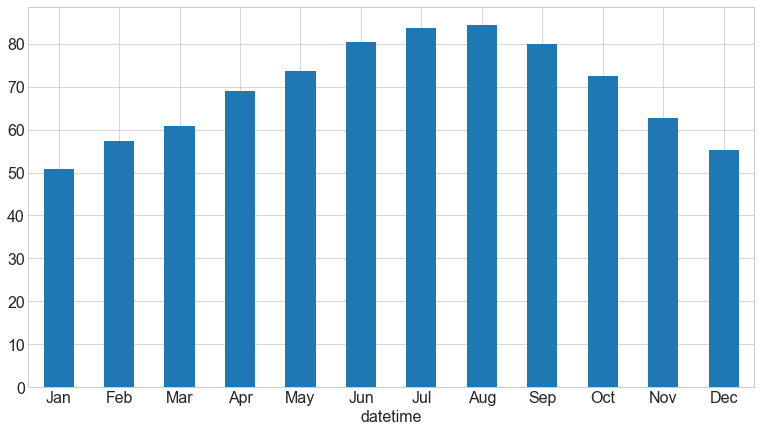

In [53]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);

### Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

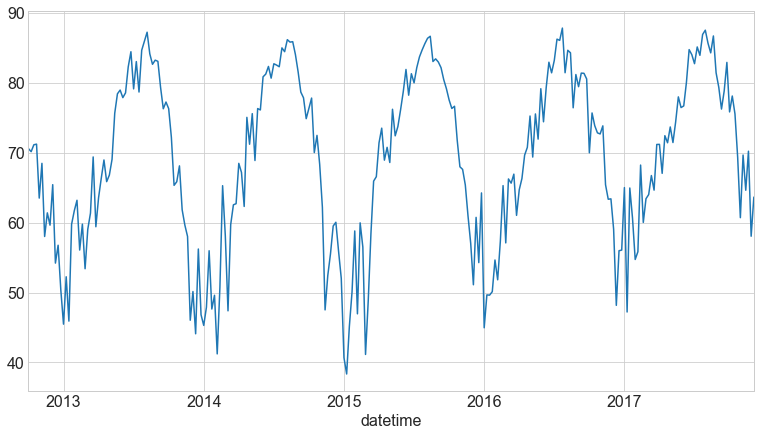

In [54]:
# how can i customize the x axis label here?

y.resample('W').mean().plot()
plt.xticks();

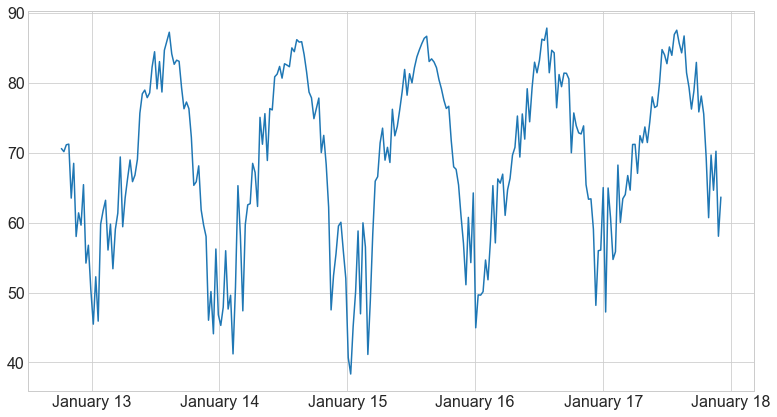

In [55]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%B %y'))